<a href="https://colab.research.google.com/github/yuvaneshs005/Car-Price-Prediction-Using-Machine-Learning/blob/main/Car_price_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 Car Price Prediction - Cleaned & Enhanced Notebook

In [1]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
# 📁 Load the dataset
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
# 📊 Dataset Overview
print(car_dataset.shape)
print(car_dataset.info())
print(car_dataset.isnull().sum())

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [4]:
# 🔍 Categorical Data Distribution
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [5]:
# 🔄 Encoding Categorical Columns
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

<ipython-input-5-00536de5381e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
<ipython-input-5-00536de5381e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
<ipython-input-5-00536de5381e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [6]:
# 🧮 Splitting Features and Target
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

# ✂️ Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## 🔢 Linear Regression

Linear Regression R² (Train): 0.8799451660493711
Linear Regression R² (Test): 0.8365766715027051


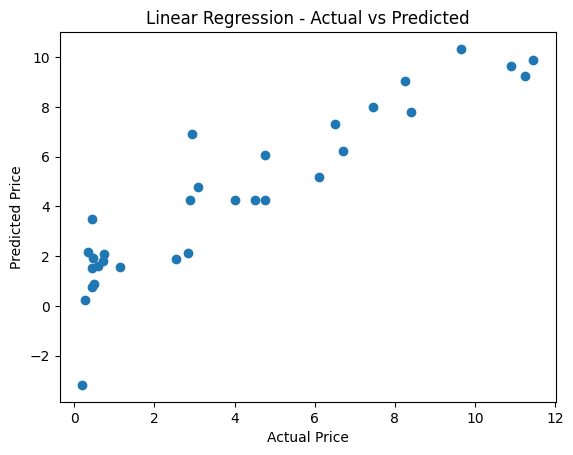

In [7]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

train_pred_lr = lin_reg_model.predict(X_train)
test_pred_lr = lin_reg_model.predict(X_test)

print("Linear Regression R² (Train):", metrics.r2_score(Y_train, train_pred_lr))
print("Linear Regression R² (Test):", metrics.r2_score(Y_test, test_pred_lr))

plt.scatter(Y_test, test_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()

## 🔢 Lasso Regression

Lasso Regression R² (Train): 0.8427856123435794
Lasso Regression R² (Test): 0.8709167941173195


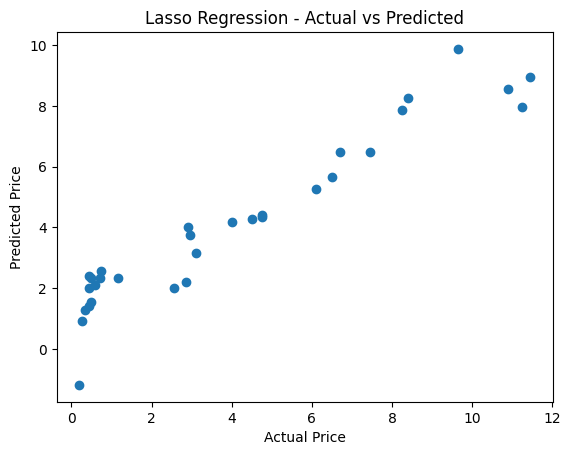

In [8]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

train_pred_lasso = lasso_model.predict(X_train)
test_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression R² (Train):", metrics.r2_score(Y_train, train_pred_lasso))
print("Lasso Regression R² (Test):", metrics.r2_score(Y_test, test_pred_lasso))

plt.scatter(Y_test, test_pred_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression - Actual vs Predicted")
plt.show()

## 🌲 Random Forest with Cross-Validation & Hyperparameter Tuning

In [9]:
# Baseline model and cross-validation
rf = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='r2')
print("CV R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

CV R² Scores: [0.94627703 0.88043631 0.9477774  0.84042433 0.96658113]
Mean CV R²: 0.9162992390432902


In [10]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R² Score: 0.9163640445961974


Random Forest R² (Test): 0.979590817821835
Random Forest RMSE: 0.5181889247113917


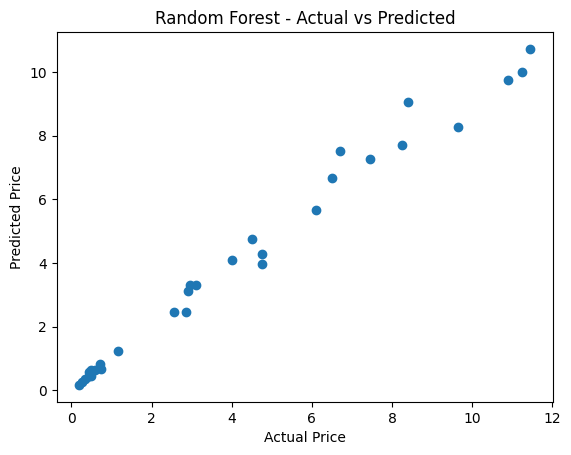

In [17]:
# Evaluate on test set
# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest R² (Test):", metrics.r2_score(Y_test, y_pred_rf))

# Manually calculate RMSE for compatibility
import numpy as np
mse = metrics.mean_squared_error(Y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("Random Forest RMSE:", rmse)

# Plotting predictions vs actual
plt.scatter(Y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest - Actual vs Predicted")
plt.show()
